In [10]:
# evaluate an ARIMA model using a walk-forward validation
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
import pandas_datareader.data as wb
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [11]:
# load dataset
def get_data_from_api(ticker, start_date, end_date):
    dataframe = wb.DataReader(ticker, 'yahoo', start_date, end_date)
    return dataframe

start = datetime(2021,1,1)
end = datetime(2021,5,5)
tickerList = 'MSFT'
df = get_data_from_api(tickerList, start, end)
df = df[['Close']]

                 Close
Date                  
2021-01-04  217.690002
2021-01-05  217.899994
2021-01-06  212.250000
2021-01-07  218.289993
2021-01-08  219.619995


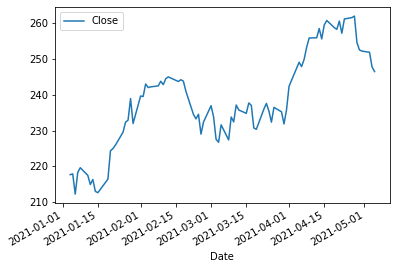

In [12]:
# split into train and test sets

print(df.head())
df.plot()
pyplot.show()

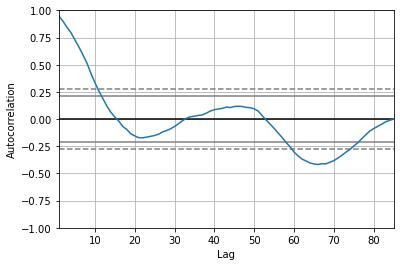

In [13]:
autocorrelation_plot(df)
pyplot.show()

In [14]:
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=236.406519, expected=232.339996
predicted=234.308944, expected=236.479996
predicted=236.125879, expected=235.240005
predicted=234.547833, expected=231.850006
predicted=231.907223, expected=235.770004
predicted=236.490096, expected=242.350006
predicted=240.141315, expected=249.070007
predicted=247.451182, expected=247.860001
predicted=248.948968, expected=249.899994
predicted=251.346079, expected=253.250000
predicted=254.366538, expected=255.850006
predicted=254.939683, expected=255.910004
predicted=256.600862, expected=258.489990
predicted=259.332042, expected=255.589996
predicted=256.311709, expected=259.500000
predicted=259.203012, expected=260.739990
predicted=261.197259, expected=258.739990
predicted=258.144419, expected=258.260010
predicted=259.633041, expected=260.579987
predicted=260.520773, expected=257.170013
predicted=256.764903, expected=261.149994
predicted=260.838336, expected=261.549988
predicted=261.891116, expected=261.970001
predicted=261.084705, expected=254

In [15]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3.221


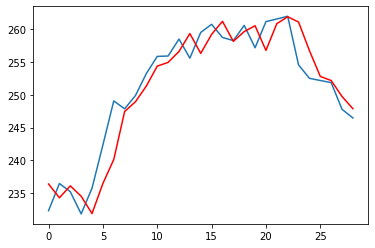

In [9]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()